# **Codesoft Internship projects**

# **CREDIT CARD FRAUD DETECTION**

**Bushra Akram**

# **Import Libraries**



In [3]:
#importing required packages

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')
#setting backend for matplotlib
%matplotlib inline


# **Load Data**

In [7]:
#loading the dataset
data = pd.read_csv('/content/fraudTest.csv')





# **EDA**

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0


In [8]:
# Basic statistics of the dataset
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15582.000000,1.558200e+04,15582.000000,15582.000000,15582.000000,15582.000000,1.558200e+04,1.558200e+04,15582.000000,15581.000000,15581.000000
mean,7790.500000,4.170574e+17,67.953438,48543.409447,38.515453,-90.053311,9.277153e+04,1.372010e+09,38.508582,-90.052234,0.003016
std,4498.280283,1.310273e+18,138.602156,26758.935531,5.094100,13.580491,3.174108e+05,1.289608e+05,5.130652,13.589005,0.054841
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,3895.250000,1.800468e+14,9.390000,26041.000000,34.544400,-96.701000,7.610000e+02,1.371908e+09,34.672618,-96.726579,0.000000
50%,7790.500000,3.519233e+15,45.635000,48038.500000,39.371600,-87.349000,2.526000e+03,1.371992e+09,39.373863,-87.305194,0.000000
75%,11685.750000,4.634956e+15,81.487500,72011.000000,42.014400,-80.158000,2.113400e+04,1.372112e+09,41.974959,-80.201133,0.000000
max,15581.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372270e+09,66.669356,-66.960745,1.000000


In [9]:
# Check for missing values
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15582 non-null  int64  
 1   trans_date_trans_time  15582 non-null  object 
 2   cc_num                 15582 non-null  int64  
 3   merchant               15582 non-null  object 
 4   category               15582 non-null  object 
 5   amt                    15582 non-null  float64
 6   first                  15582 non-null  object 
 7   last                   15582 non-null  object 
 8   gender                 15582 non-null  object 
 9   street                 15582 non-null  object 
 10  city                   15582 non-null  object 
 11  state                  15582 non-null  object 
 12  zip                    15582 non-null  int64  
 13  lat                    15582 non-null  float64
 14  long                   15582 non-null  float64
 15  ci

In [11]:
# Fill with mean
data['merch_long'].fillna(value=data['merch_long'].mean(), inplace=True)

# Fill with median
data['is_fraud'].fillna(value=data['is_fraud'].median(), inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15582 non-null  int64  
 1   trans_date_trans_time  15582 non-null  object 
 2   cc_num                 15582 non-null  int64  
 3   merchant               15582 non-null  object 
 4   category               15582 non-null  object 
 5   amt                    15582 non-null  float64
 6   first                  15582 non-null  object 
 7   last                   15582 non-null  object 
 8   gender                 15582 non-null  object 
 9   street                 15582 non-null  object 
 10  city                   15582 non-null  object 
 11  state                  15582 non-null  object 
 12  zip                    15582 non-null  int64  
 13  lat                    15582 non-null  float64
 14  long                   15582 non-null  float64
 15  ci

# **Data Visualization**

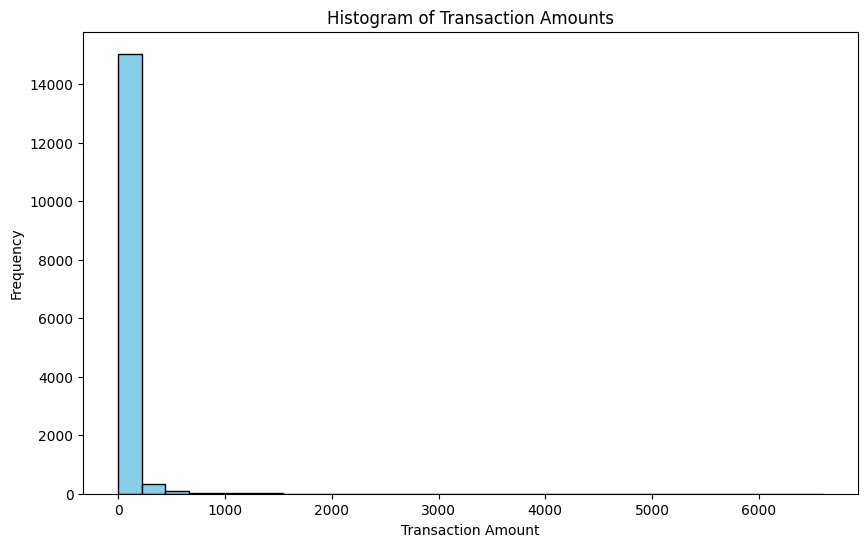

In [13]:
# Data Visualization with Plots
# Example: Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
plt.hist(data['amt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()

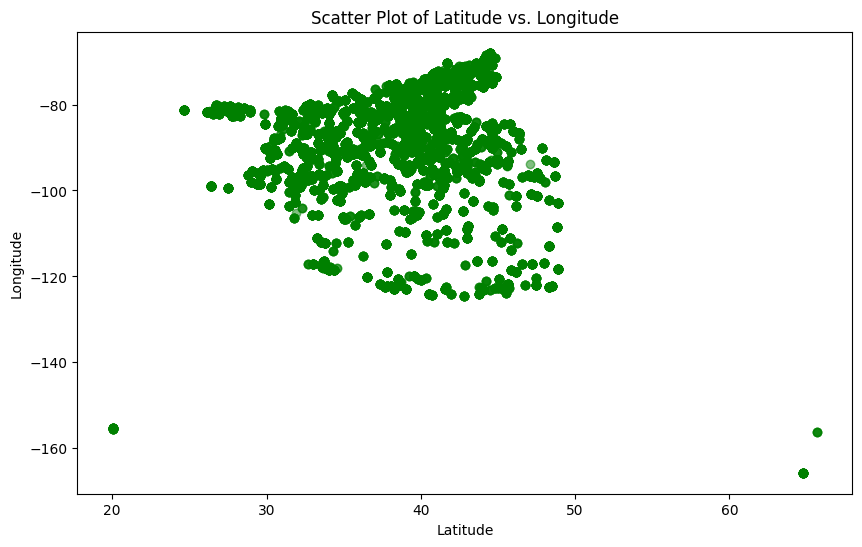

In [14]:
# Example: Scatter Plot of Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(data['lat'], data['long'], color='green', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.show()

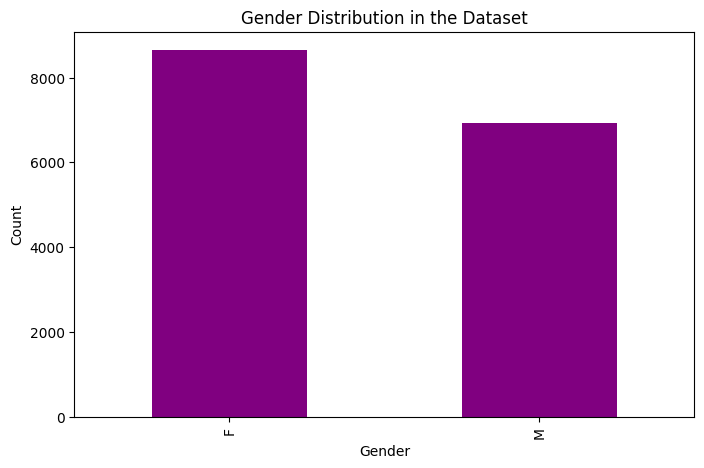

In [15]:
# Example: Bar Plot of Gender Distribution
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color='purple')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in the Dataset')
plt.show()

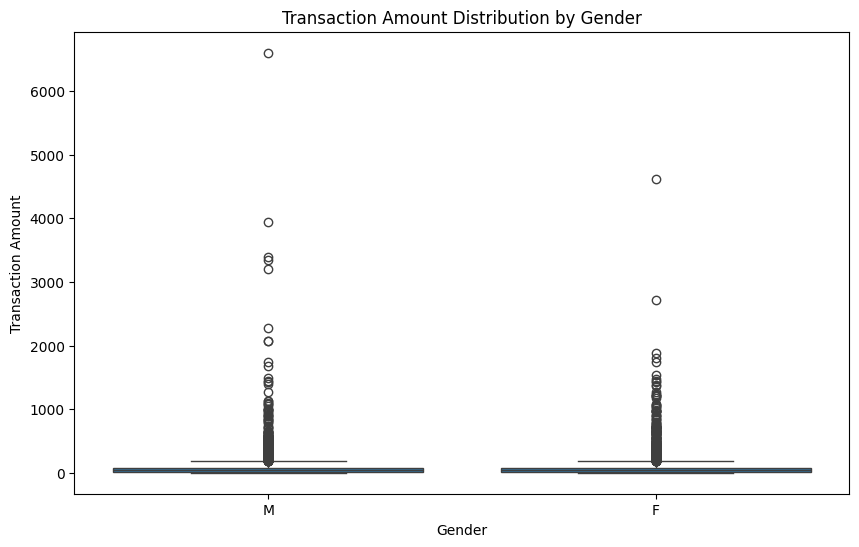

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=data)
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Gender')
plt.show()

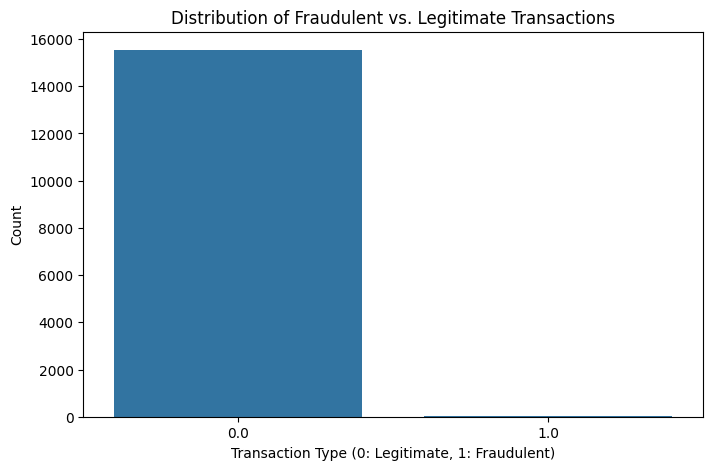

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=data)
plt.xlabel('Transaction Type (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()

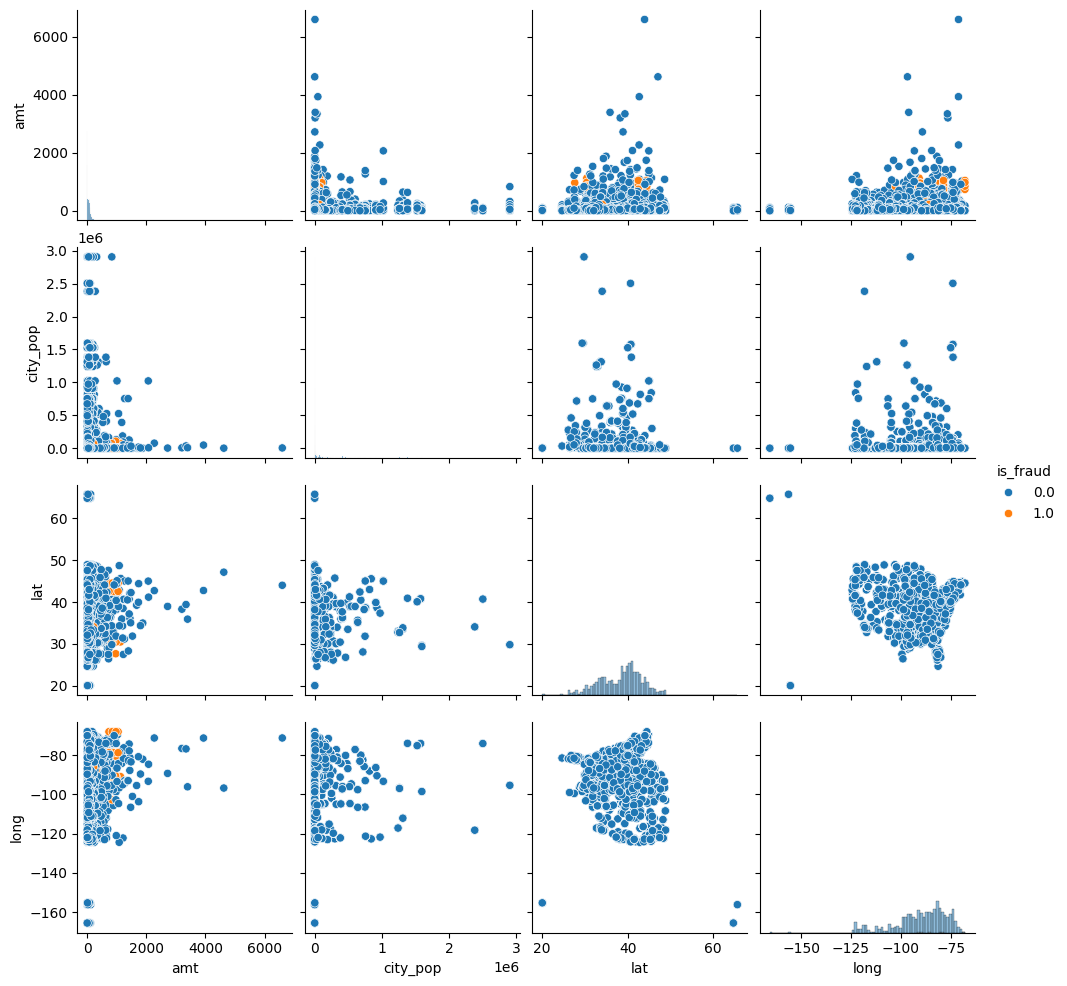

In [18]:
sns.pairplot(data[['amt', 'city_pop', 'lat', 'long', 'is_fraud']], hue='is_fraud', diag_kind='hist')
plt.show()



# **Heatmap**

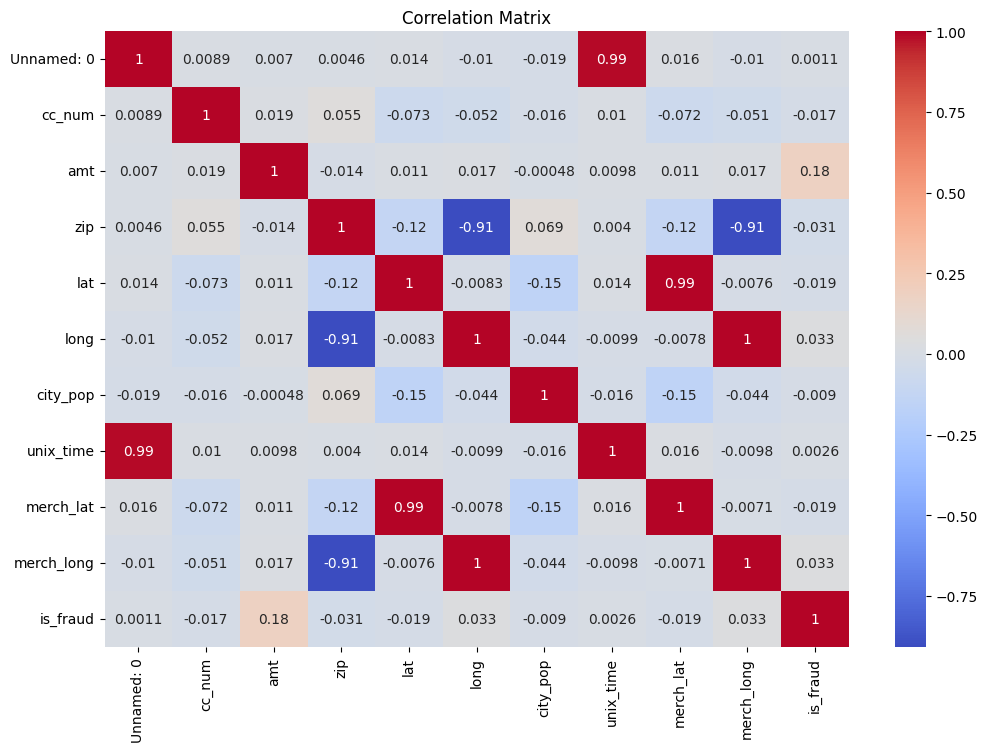

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Libraries**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# **Define Features and Target Variabls**

In [21]:
# Define features and target variable
X = data[['amt', 'lat', 'long', 'city_pop']]  # Select relevant features for training
y = data['is_fraud']  # Target variable

# **Train Test Split**

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Standardize Features**

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression Model**

In [24]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Evaluate models
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [32]:
# Model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9961501443695862


In [36]:
# Additional evaluation metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3107
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00      3117
   macro avg       0.50      0.50      0.50      3117
weighted avg       0.99      1.00      0.99      3117



# **Decision Tree Model**

In [26]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.9967917869746551


In [37]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3107
         1.0       0.50      0.50      0.50        10

    accuracy                           1.00      3117
   macro avg       0.75      0.75      0.75      3117
weighted avg       1.00      1.00      1.00      3117



# **Decision Tree Model**

In [27]:
# Train Decision Tree model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.9977542508822586


In [38]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3107
         1.0       0.71      0.50      0.59        10

    accuracy                           1.00      3117
   macro avg       0.86      0.75      0.79      3117
weighted avg       1.00      1.00      1.00      3117

